## MultiAlexNetTraining

In [12]:
import torchvision.transforms as transforms
from utils.Dataset import Dataset  
from models.classifiers import BinaryAlexNet,MultiAlexNet,BinaryAdroBalaNet
from utils.ModelTrainer import ModelTrainer
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.nn.functional as F
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
from tqdm import tqdm
import matplotlib.pyplot as plt

En aquest fitxer, realitzarem l'entrenament per al classificador multiclasse AlexNet. El primer que realitzarem es l'importació de les imatges que tractarà el model:

In [13]:
oxford=Dataset('class',227)

Extracting and transforming values from train data:  14%|█████▉                                     | 822/5920 [00:03<00:18, 273.74it/s]Corrupt JPEG data: premature end of data segment
Extracting and transforming values from train data:  52%|█████████████████████▊                    | 3078/5920 [00:11<00:09, 284.29it/s]Corrupt JPEG data: 245 extraneous bytes before marker 0xd9
Extracting and transforming values from train data: 100%|██████████████████████████████████████████| 5920/5920 [00:21<00:00, 278.41it/s]
Extracting and transforming values from test data: 100%|███████████████████████████████████████████| 1470/1470 [00:05<00:00, 278.00it/s]

Data loaded succesfully!


Guardem dins dues variables les fotos corresponents al conjunt d'entrenament i de test:

In [14]:
train_loader = torch.utils.data.DataLoader(oxford.train, 64, shuffle = True)
test_loader = torch.utils.data.DataLoader(oxford.test, 100, shuffle = True)

Generam l'iterador amb el qual podrem iterar sobre totes les imatges

In [15]:
iterador =  iter(test_loader)
next(iterador)

[tensor([[[[-0.7502, -0.0610, -0.3828,  ...,  2.2174,  2.2354,  2.2489],
           [-0.4322, -0.1890, -0.4064,  ...,  2.2233,  2.2294,  2.2423],
           [-0.4520, -0.1483, -0.2761,  ...,  2.2322,  2.2251,  2.2222],
           ...,
           [-1.3525, -1.3878, -1.3231,  ..., -1.2432, -0.7417, -1.0445],
           [-1.7487, -1.4719, -1.5616,  ..., -1.4918, -1.1863, -0.5981],
           [-1.7046, -1.5917, -1.5419,  ..., -1.7252, -1.6130, -1.0337]],
 
          [[-0.0833,  0.4554,  0.4060,  ...,  2.2907,  2.2837,  2.2704],
           [ 0.1537,  0.3819,  0.3837,  ...,  2.3142,  2.3082,  2.2895],
           [ 0.0884,  0.4358,  0.5481,  ...,  2.3494,  2.3326,  2.3224],
           ...,
           [-0.9586, -0.8754, -0.3379,  ..., -0.8805, -0.1398, -0.6874],
           [-1.4544, -0.7939, -0.6561,  ..., -1.1068, -0.8232,  0.0428],
           [-1.3858, -0.6814, -0.9153,  ..., -1.2894, -1.2859, -0.4704]],
 
          [[ 0.5585,  0.9533,  0.6608,  ...,  2.4050,  2.3789,  2.3662],
           [ 

Una vegada esta tot preparat, realitzam l'entrenament corresponent al model:

In [16]:
# Entrenament Multiclasse AlexNet
use_cuda = False
torch.manual_seed(33)

if use_cuda:
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
    
lr = 1e-1

model = MultiAlexNet().to(device)
optimizer = optim.SGD(model.parameters(), lr=lr)

trainer = ModelTrainer(train_loader,test_loader,optimizer,F.cross_entropy,30)

best_model, train_loss, test_loss = trainer.train_test(model, device)

Trainable Parameters:  54047269


  3%|███▎                                                                                                | 1/30 [00:59<28:48, 59.62s/it]


Test set: Average loss: 0.0368, Accuracy: 40/1470 (2.72%)



  7%|██████▋                                                                                             | 2/30 [01:56<27:09, 58.18s/it]


Test set: Average loss: 0.0366, Accuracy: 60/1470 (4.08%)



 10%|██████████                                                                                          | 3/30 [02:54<26:03, 57.90s/it]


Test set: Average loss: 0.0365, Accuracy: 90/1470 (6.12%)



 13%|█████████████▎                                                                                      | 4/30 [03:52<25:04, 57.86s/it]


Test set: Average loss: 0.0361, Accuracy: 182/1470 (12.38%)



 17%|████████████████▋                                                                                   | 5/30 [04:49<24:05, 57.82s/it]


Test set: Average loss: 0.0357, Accuracy: 222/1470 (15.10%)



 20%|████████████████████                                                                                | 6/30 [05:47<23:02, 57.62s/it]


Test set: Average loss: 0.0354, Accuracy: 263/1470 (17.89%)



 23%|███████████████████████▎                                                                            | 7/30 [06:43<21:57, 57.28s/it]


Test set: Average loss: 0.0351, Accuracy: 325/1470 (22.11%)



 27%|██████████████████████████▋                                                                         | 8/30 [07:40<20:57, 57.15s/it]


Test set: Average loss: 0.0351, Accuracy: 322/1470 (21.90%)



 30%|██████████████████████████████                                                                      | 9/30 [08:37<20:00, 57.18s/it]


Test set: Average loss: 0.0347, Accuracy: 372/1470 (25.31%)



 33%|█████████████████████████████████                                                                  | 10/30 [09:35<19:03, 57.18s/it]


Test set: Average loss: 0.0347, Accuracy: 372/1470 (25.31%)



 37%|████████████████████████████████████▎                                                              | 11/30 [10:32<18:07, 57.22s/it]


Test set: Average loss: 0.0347, Accuracy: 387/1470 (26.33%)



 40%|███████████████████████████████████████▌                                                           | 12/30 [11:29<17:10, 57.23s/it]


Test set: Average loss: 0.0346, Accuracy: 391/1470 (26.60%)



 43%|██████████████████████████████████████████▉                                                        | 13/30 [12:26<16:08, 56.99s/it]


Test set: Average loss: 0.0345, Accuracy: 407/1470 (27.69%)



 47%|██████████████████████████████████████████████▏                                                    | 14/30 [13:22<15:08, 56.77s/it]


Test set: Average loss: 0.0345, Accuracy: 415/1470 (28.23%)



 50%|█████████████████████████████████████████████████▌                                                 | 15/30 [14:19<14:12, 56.87s/it]


Test set: Average loss: 0.0343, Accuracy: 437/1470 (29.73%)



 53%|████████████████████████████████████████████████████▊                                              | 16/30 [15:16<13:18, 57.05s/it]


Test set: Average loss: 0.0343, Accuracy: 445/1470 (30.27%)



 57%|████████████████████████████████████████████████████████                                           | 17/30 [16:14<12:22, 57.11s/it]


Test set: Average loss: 0.0343, Accuracy: 436/1470 (29.66%)



 60%|███████████████████████████████████████████████████████████▍                                       | 18/30 [17:11<11:25, 57.14s/it]


Test set: Average loss: 0.0342, Accuracy: 451/1470 (30.68%)



 63%|██████████████████████████████████████████████████████████████▋                                    | 19/30 [18:08<10:29, 57.20s/it]


Test set: Average loss: 0.0342, Accuracy: 442/1470 (30.07%)



 67%|██████████████████████████████████████████████████████████████████                                 | 20/30 [19:06<09:32, 57.29s/it]


Test set: Average loss: 0.0341, Accuracy: 459/1470 (31.22%)



 70%|█████████████████████████████████████████████████████████████████████▎                             | 21/30 [20:02<08:33, 57.03s/it]


Test set: Average loss: 0.0342, Accuracy: 441/1470 (30.00%)



 73%|████████████████████████████████████████████████████████████████████████▌                          | 22/30 [20:58<07:34, 56.75s/it]


Test set: Average loss: 0.0341, Accuracy: 463/1470 (31.50%)



 77%|███████████████████████████████████████████████████████████████████████████▉                       | 23/30 [21:54<06:36, 56.61s/it]


Test set: Average loss: 0.0340, Accuracy: 474/1470 (32.24%)



 80%|███████████████████████████████████████████████████████████████████████████████▏                   | 24/30 [22:52<05:40, 56.79s/it]


Test set: Average loss: 0.0340, Accuracy: 472/1470 (32.11%)



 83%|██████████████████████████████████████████████████████████████████████████████████▌                | 25/30 [23:48<04:43, 56.68s/it]


Test set: Average loss: 0.0340, Accuracy: 472/1470 (32.11%)



 87%|█████████████████████████████████████████████████████████████████████████████████████▊             | 26/30 [24:45<03:46, 56.72s/it]


Test set: Average loss: 0.0340, Accuracy: 479/1470 (32.59%)



 90%|█████████████████████████████████████████████████████████████████████████████████████████          | 27/30 [25:42<02:50, 56.91s/it]


Test set: Average loss: 0.0339, Accuracy: 483/1470 (32.86%)



 93%|████████████████████████████████████████████████████████████████████████████████████████████▍      | 28/30 [26:40<01:54, 57.05s/it]


Test set: Average loss: 0.0340, Accuracy: 480/1470 (32.65%)



 97%|███████████████████████████████████████████████████████████████████████████████████████████████▋   | 29/30 [27:37<00:57, 57.21s/it]


Test set: Average loss: 0.0340, Accuracy: 472/1470 (32.11%)



100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [28:34<00:00, 57.16s/it]


Test set: Average loss: 0.0339, Accuracy: 488/1470 (33.20%)



Una vegada finalitzat l'entrenament, generam el fitxer de pesos del model:

In [18]:
# Guardem els pesos del model
path_to_save = 'weights/model_weights_Multi_Alex_Net.pth'
torch.save(best_model.state_dict(), path_to_save)

Finalment, mostrem la gràfica de pèrdua que ha tingut el model durant l'entrenament:

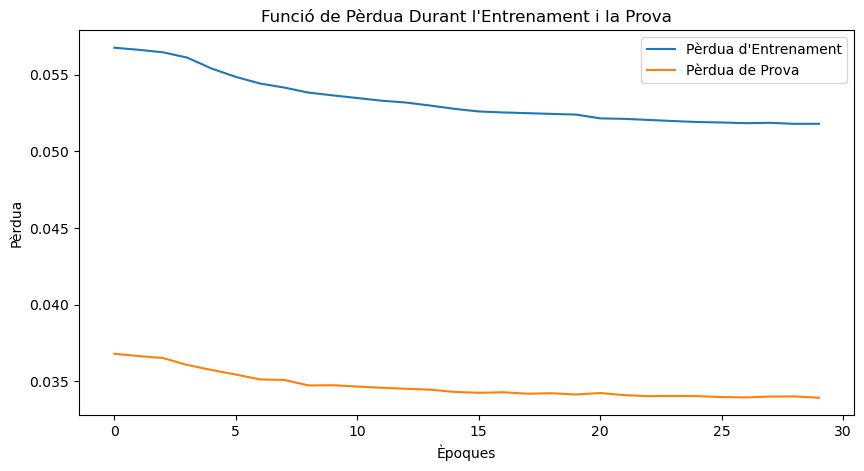

In [19]:
# Creant el gràfic de pèrdua
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Pèrdua d\'Entrenament')
plt.plot(test_loss, label='Pèrdua de Prova')
plt.title('Funció de Pèrdua Durant l\'Entrenament i la Prova')
plt.xlabel('Èpoques')
plt.ylabel('Pèrdua')
plt.legend()
plt.show()

Una vegada entrenat el model i mostrada la funció de pèrdua, anem a comprovar que realment hem emmagatzemat els pesos del millor model que hem entrenat:

In [20]:
ruta_modelo = 'weights/model_weights_Multi_Alex_Net.pth'
model = MultiAlexNet()
model.load_state_dict(torch.load(ruta_modelo))
model.eval()

test_loss = 0
correct = 0
with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        output = best_model(data)
        output = torch.squeeze(output)
        test_loss += F.cross_entropy(output, target, reduction='mean') 
        pred = output.argmax(dim=1, keepdim=True)  # get the index of the max probability
        correct += pred.eq(target.view_as(pred)).sum().item()

test_loss /= len(test_loader.dataset)

accuracy = 100. * correct / len(test_loader.dataset)

print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset), accuracy))


Test set: Average loss: 0.0339, Accuracy: 488/1470 (33.20%)

